<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Statistic-related-Python/blob/main/RegressionAnalysisforCHIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A) The data:

The company acquired data through a survey that had been responded by current tenants. Q6 is que question that represents the overall satisfaction, therefore we could think it as the dependent variable. Its causes are customer service quality, information and understading of the service, quality of repairs, and others.

In [440]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [441]:
survey_data = pd.read_excel("/content/drive/MyDrive/De-identified Raw Data CHIA NSW v2.xlsx")
survey_data = survey_data.drop(0)
print("In total the dataset has:", survey_data.shape[0], "rows and", survey_data.shape[1], "columns" )
survey_data.head(4)

In total the dataset has: 446 rows and 36 columns


,Program,Region,Q1,Q2,Q3,Q4,Q6,Q7,Q8,Q9,...,Q29,Q30,Q31,Q32,Q34,Q35,Q36,LGA,PROGRAM_C,State
1,LEASEHOLD,WAGGA WAGGA,Man,55-59,No,"""English""",Very satisfied,Very satisfied,Very satisfied,Yes,...,"""Could not pay gas, electricity or telephone b...",NaN,By email,"""Very satisfied""",Fairly satisfied,Very satisfied,"""Education Scholarships"",""Learner driver progr...",WAGGA,LEASEHOLD,NSW
2,CAPITAL,WAGGA WAGGA,Man,55-59,No,"""English""",Neither,Fairly satisfied,Neither,Yes,...,"""No/none of these""",NaN,By phone,"""Fairly satisfied""",Neither,Neither,"""Education Scholarships"",""Learner driver progr...",WAGGA,CAPITAL,NSW
3,CAPITAL,WAGGA WAGGA,Woman,30-34,No,"""English""",Fairly satisfied,Very satisfied,Very satisfied,Yes,...,"""Were unable to heat your home""",NaN,By email,"""Very satisfied""",Very satisfied,Very satisfied,"""Education Scholarships""",WAGGA,CAPITAL,NSW
4,CAPITAL,SUTHERLAND,Man,70-74,No,"""English""",Very satisfied,Very satisfied,Fairly satisfied,Yes,...,"""No/none of these""",NaN,By phone,"""Fairly satisfied""",Fairly satisfied,Fairly satisfied,"""Education Scholarships"",""Learner driver progr...",SUTHERLAND,CAPITAL,NSW


In [442]:
for column in survey_data.columns:
  uniques = survey_data[column].unique()
  print(column, len(uniques), uniques)

Program 3 ['LEASEHOLD' 'CAPITAL' 'BOARDING']
Region 8 ['WAGGA WAGGA' 'SUTHERLAND' 'LISMORE' 'ALBURY' 'PORT KEMBLA' 'TAREE'
 'DUBBO' 'BROKEN HILL']
Q1 5 ['Man' 'Woman' 'Prefer not to disclose' nan 'Non-binary']
Q2 17 ['55-59' '30-34' '70-74' '40-44' '25-29' '45-49' '50-54' '60-64' '35-39'
 '65-69' '75-79' '80-84' '15-19' nan '20-24' '85-89' '90-94']
Q3 5 ['No' 'Yes, Aboriginal' 'Yes, Torres Strait Islander' 'Yes, both' nan]
Q4 6 ['"English"' '"Spanish"' '"Mandarin"' '"Other"' nan '"English","Other"']
Q6 5 ['Very satisfied' 'Neither' 'Fairly satisfied' 'Very dissatisfied'
 'Fairly dissatisfied']
Q7 6 ['Very satisfied' 'Fairly satisfied' 'Very dissatisfied' 'Neither'
 'Fairly dissatisfied' nan]
Q8 6 ['Very satisfied' 'Neither' 'Fairly satisfied' 'Fairly dissatisfied'
 'Very dissatisfied' nan]
Q9 4 ['Yes' 'Unsure' 'No' nan]
Q10 6 ['Very satisfied' 'Very dissatisfied' 'Fairly satisfied'
 'Fairly dissatisfied' 'Neither' nan]
Q11 6 ['Very satisfied' 'Neither' 'Fairly satisfied' 'Very dissatis

# B) Shape and Null analysis

(446, 36)
Program        0
Region         0
Q1             7
Q2             6
Q3            22
Q4             5
Q6             0
Q7             4
Q8             2
Q9             7
Q10           10
Q11            4
Q12            5
Q13          310
Q14            4
Q15            8
Q16           83
Q18           12
Q19          395
Q19a         396
Q19b         393
Q19c         395
Q20            6
Q21           11
Q22           11
Q25           15
Q29           35
Q30          359
Q31           34
Q32           35
Q34           36
Q35           39
Q36          204
LGA            0
PROGRAM_C      0
State          0
dtype: int64


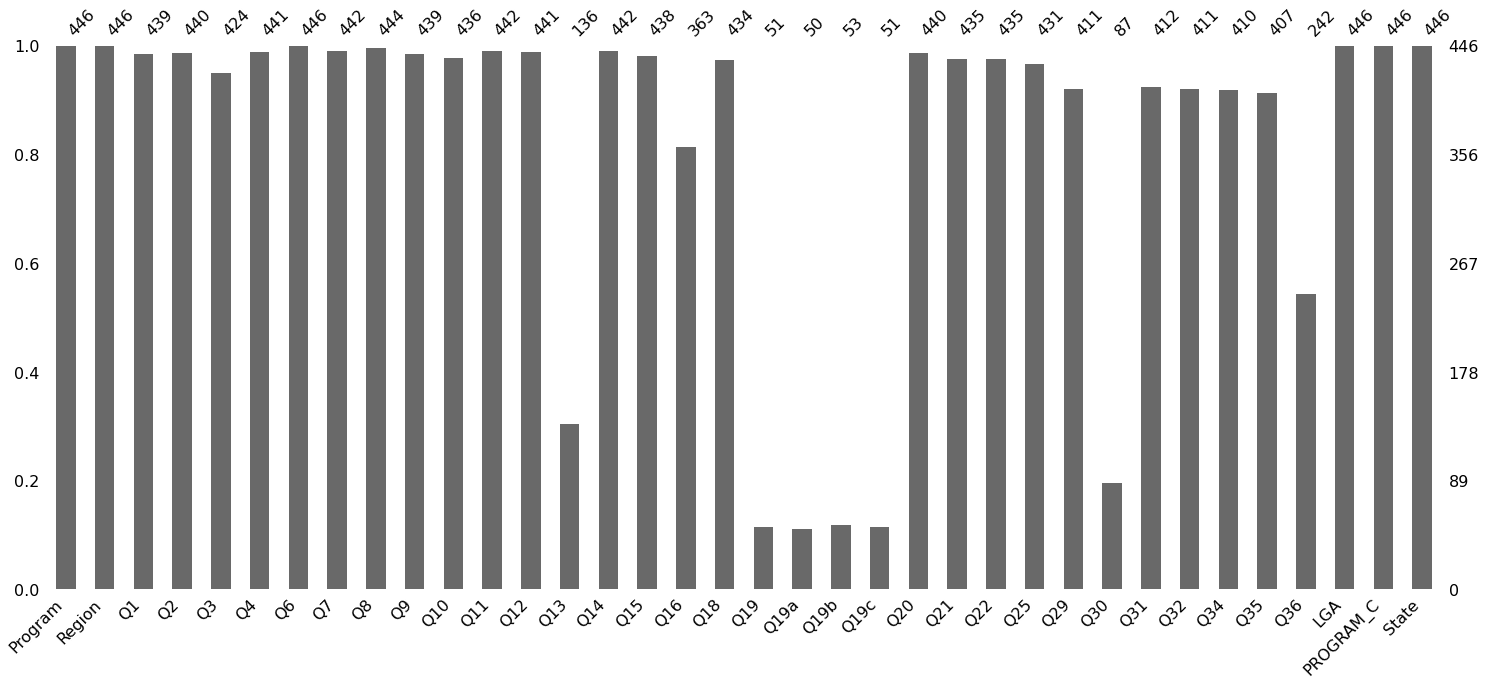

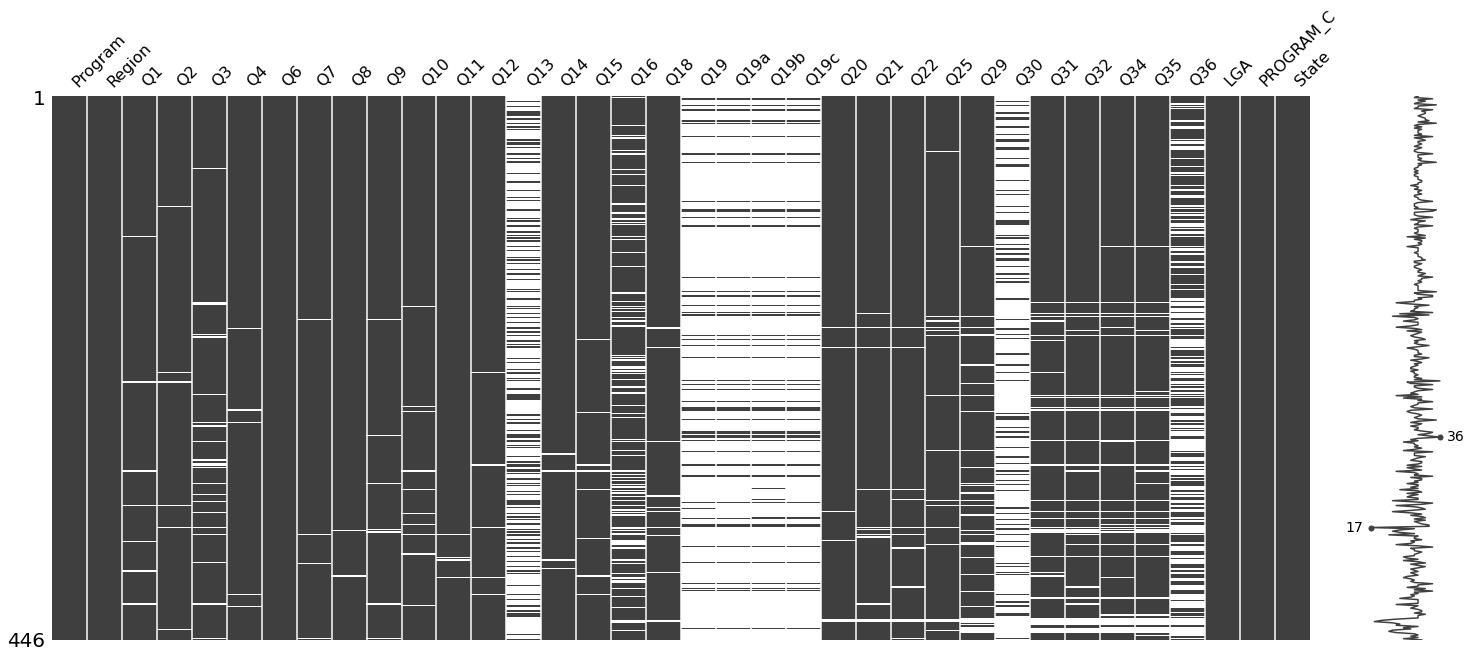

In [443]:
import missingno as msno
print(survey_data.shape)
print(survey_data.isnull().sum())
display(msno.bar(survey_data))
display(msno.matrix(survey_data))

In [444]:
print(survey_data.columns)

Index(['Program', 'Region', 'Q1', 'Q2', 'Q3', 'Q4', 'Q6', 'Q7', 'Q8', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q18', 'Q19', 'Q19a',
       'Q19b', 'Q19c', 'Q20', 'Q21', 'Q22', 'Q25', 'Q29', 'Q30', 'Q31', 'Q32',
       'Q34', 'Q35', 'Q36', 'LGA', 'PROGRAM_C', 'State'],
      dtype='object')


# C) Droping variables and preprocessing

Seems the survey has many variables. After droping we will have 17 predictors and 1 independent variable that is the overall satisfaction. Which are the most important features of overall satisfaction?

In [445]:
# List of columns to drop

columns_drop = ['Program', 'Region', 'Q1', 'Q2', 'Q3', 'Q4', 'Q13', 'Q16', 'Q19', 'Q19a',
       'Q19b', 'Q19c', 'Q30', 'Q31', 'Q36', 'LGA', 'PROGRAM_C', 'State']

survey_data = survey_data.drop(columns_drop, axis=1)
display(survey_data.head())


,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q14,Q15,Q18,Q20,Q21,Q22,Q25,Q29,Q32,Q34,Q35
1,Very satisfied,Very satisfied,Very satisfied,Yes,Very satisfied,Very satisfied,Yes,Very satisfied,Yes,No,6-10 years,Very satisfied,Very satisfied,Greatly improved,"""Could not pay gas, electricity or telephone b...","""Very satisfied""",Fairly satisfied,Very satisfied
2,Neither,Fairly satisfied,Neither,Yes,Very dissatisfied,Neither,Yes,Fairly satisfied,Yes,No,6-10 years,Neither,Neither,Stayed the same,"""No/none of these""","""Fairly satisfied""",Neither,Neither
3,Fairly satisfied,Very satisfied,Very satisfied,Yes,Fairly satisfied,Fairly satisfied,Yes,Fairly satisfied,Yes,Yes,10+ years,Fairly dissatisfied,Very satisfied,Slightly improved,"""Were unable to heat your home""","""Very satisfied""",Very satisfied,Very satisfied
4,Very satisfied,Very satisfied,Fairly satisfied,Yes,Very satisfied,Very satisfied,Yes,Very satisfied,Yes,No,10+ years,Fairly satisfied,Very satisfied,Greatly improved,"""No/none of these""","""Fairly satisfied""",Fairly satisfied,Fairly satisfied
5,Very satisfied,Very satisfied,Very satisfied,Yes,Very satisfied,Very satisfied,Yes,Very satisfied,Yes,No,3-5 years,Very satisfied,Very satisfied,Greatly improved,"""No/none of these""","""Very satisfied""",Very satisfied,Very satisfied


In [446]:
# How many columns de we have left?
print(len(survey_data.columns))

# Rename question 6 as it is the dependent variable
survey_data.rename(columns = {'Q6':'y'}, inplace = True)

18


(446, 18)


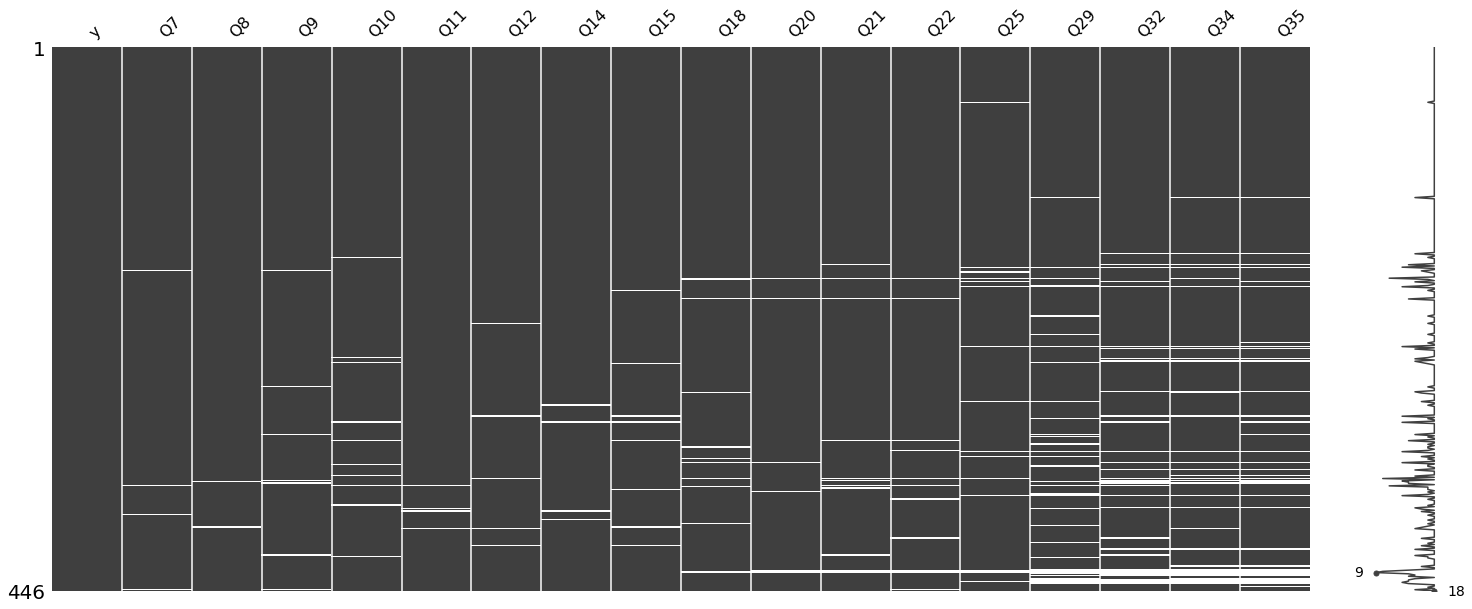

In [447]:
# What is the shape?
print(survey_data.shape)

# Do we still have Null values?
display(msno.matrix(survey_data))

(354, 18)


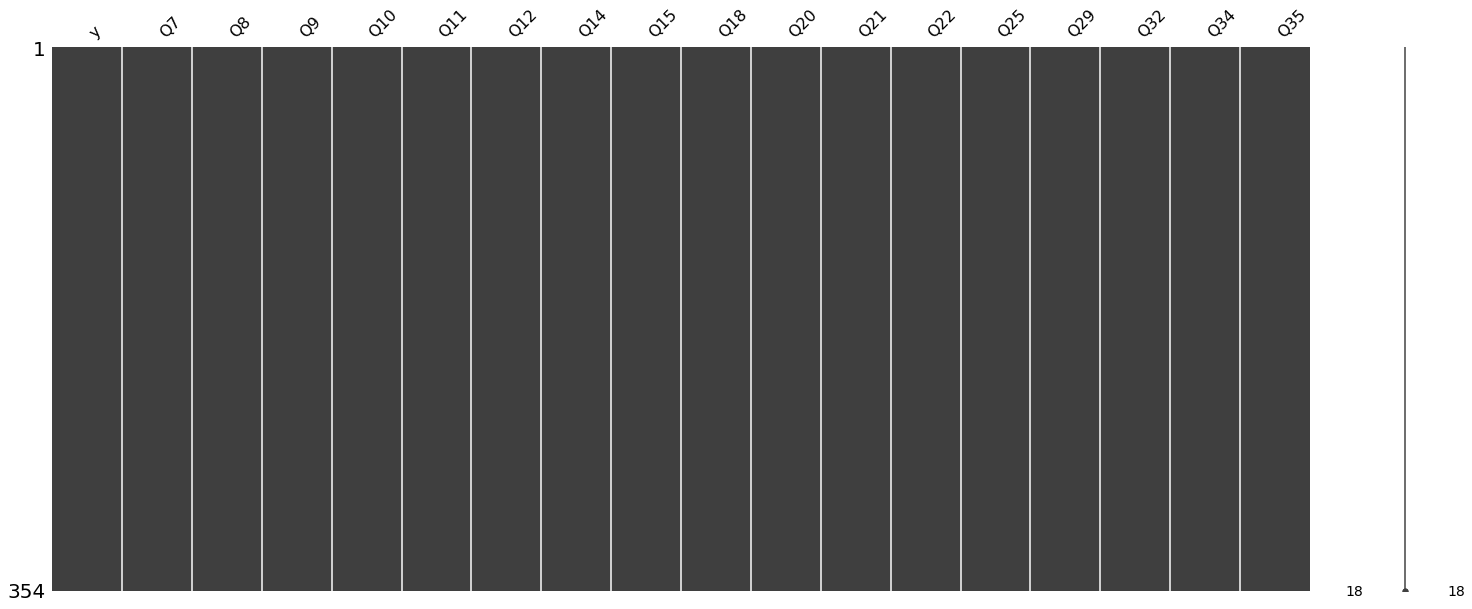

In [448]:
# Drop all NaNs
survey_data = survey_data.dropna()
print(survey_data.shape)
display(msno.matrix(survey_data))

## Ordinal Encoding

In [449]:
for column in survey_data.columns:
  uniques = survey_data[column].unique()
  if len(uniques) < 10:
    print("Column name:", column, "How many categories?:", len(uniques),"\nList: ", uniques),
  else:
      print("Column name:", column, "How many categories?:", len(uniques))

Column name: y How many categories?: 5 
List:  ['Very satisfied' 'Neither' 'Fairly satisfied' 'Very dissatisfied'
 'Fairly dissatisfied']
Column name: Q7 How many categories?: 5 
List:  ['Very satisfied' 'Fairly satisfied' 'Very dissatisfied' 'Neither'
 'Fairly dissatisfied']
Column name: Q8 How many categories?: 5 
List:  ['Very satisfied' 'Neither' 'Fairly satisfied' 'Fairly dissatisfied'
 'Very dissatisfied']
Column name: Q9 How many categories?: 3 
List:  ['Yes' 'Unsure' 'No']
Column name: Q10 How many categories?: 5 
List:  ['Very satisfied' 'Very dissatisfied' 'Fairly satisfied'
 'Fairly dissatisfied' 'Neither']
Column name: Q11 How many categories?: 5 
List:  ['Very satisfied' 'Neither' 'Fairly satisfied' 'Very dissatisfied'
 'Fairly dissatisfied']
Column name: Q12 How many categories?: 3 
List:  ['Yes' 'No' 'Unsure']
Column name: Q14 How many categories?: 5 
List:  ['Very satisfied' 'Fairly satisfied' 'Very dissatisfied' 'Neither'
 'Fairly dissatisfied']
Column name: Q15 How ma

In [450]:
# All columns that contains 5 categories, are going to be transformed from ordinal categories to numeric

ordinal_encoding = {'Very dissatisfied':0,'Fairly dissatisfied':1,'Neither':2,'Very satisfied':3,'Fairly satisfied':4}

for column in survey_data.columns:
  uniques = survey_data[column].unique()
  if (len(uniques) == 5) and (column != "Q25"):
    print("Column name:", column, "How many categories?:", len(uniques),"\nList: ", uniques)
    survey_data[column] = survey_data[column].map(ordinal_encoding)

Column name: y How many categories?: 5 
List:  ['Very satisfied' 'Neither' 'Fairly satisfied' 'Very dissatisfied'
 'Fairly dissatisfied']
Column name: Q7 How many categories?: 5 
List:  ['Very satisfied' 'Fairly satisfied' 'Very dissatisfied' 'Neither'
 'Fairly dissatisfied']
Column name: Q8 How many categories?: 5 
List:  ['Very satisfied' 'Neither' 'Fairly satisfied' 'Fairly dissatisfied'
 'Very dissatisfied']
Column name: Q10 How many categories?: 5 
List:  ['Very satisfied' 'Very dissatisfied' 'Fairly satisfied'
 'Fairly dissatisfied' 'Neither']
Column name: Q11 How many categories?: 5 
List:  ['Very satisfied' 'Neither' 'Fairly satisfied' 'Very dissatisfied'
 'Fairly dissatisfied']
Column name: Q14 How many categories?: 5 
List:  ['Very satisfied' 'Fairly satisfied' 'Very dissatisfied' 'Neither'
 'Fairly dissatisfied']
Column name: Q21 How many categories?: 5 
List:  ['Very satisfied' 'Neither' 'Fairly dissatisfied' 'Fairly satisfied'
 'Very dissatisfied']
Column name: Q22 How man

In [451]:
# All columns that contains 5 categories, are going to be transformed from ordinal categories to numeric

ordinal_encoding = {'Very dissatisfied':0,'Fairly dissatisfied':1,'Neither':2,'Very satisfied':3,'Fairly satisfied':4}

for column in survey_data.columns:
  uniques = survey_data[column].unique()
  if (len(uniques) != 5) or (column == "Q25"):
    print("Column name:", column, "How many categories?:", len(uniques),"\nList: ", uniques)

Column name: Q9 How many categories?: 3 
List:  ['Yes' 'Unsure' 'No']
Column name: Q12 How many categories?: 3 
List:  ['Yes' 'No' 'Unsure']
Column name: Q15 How many categories?: 3 
List:  ['Yes' 'No' 'Unsure']
Column name: Q18 How many categories?: 2 
List:  ['No' 'Yes']
Column name: Q20 How many categories?: 6 
List:  ['6-10 years' '10+ years' '3-5 years' '1 – 2 years' 'Less than 6 months'
 'Less than 12 months']
Column name: Q25 How many categories?: 5 
List:  ['Greatly improved' 'Stayed the same' 'Slightly improved'
 'Greatly declined' 'Slightly declined']
Column name: Q29 How many categories?: 107 
List:  ['"Could not pay gas, electricity or telephone bills","Could not pay for car registration or insurance on time","Sought financial assistance from friends or family"'
 '"No/none of these"' '"Were unable to heat your home"'
 '"Could not pay gas, electricity or telephone bills","Could not pay for car registration or insurance on time","Sought financial assistance from friends or fa

## Yes no Unsure as ordinal: Q9, Q12, Q15 and Q18

In [452]:
columns_to_map = ["Q9","Q12", "Q15", "Q18"]
dict_map = {'Yes':2, 'Unsure':1, 'No':0}

for column in columns_to_map:
  survey_data[column] = survey_data[column].map(dict_map)

## Q20

In [453]:
# How many categories we have in the selected column?

unique_q20 = survey_data["Q20"].unique()
print("How many categories?:", unique_q20.shape[0],"\nList: ", unique_q20)

How many categories?: 6 
List:  ['6-10 years' '10+ years' '3-5 years' '1 – 2 years' 'Less than 6 months'
 'Less than 12 months']


In [454]:
# Create a dictionary 

q20_dict = {'6-10 years':4, '10+ years':5, '3-5 years':3 ,'1 – 2 years':2, 'Less than 6 months':0, 'Less than 12 months':1}

survey_data["Q20"] = survey_data["Q20"].map(q20_dict)
survey_data["Q20"].unique()

array([4, 5, 3, 2, 0, 1])

## Q25

In [455]:
# How many categories we have in the selected column?

unique_q25 = survey_data["Q25"].unique()
print("How many categories?:", unique_q25.shape[0],"\nList: ", unique_q25)

How many categories?: 5 
List:  ['Greatly improved' 'Stayed the same' 'Slightly improved'
 'Greatly declined' 'Slightly declined']


In [456]:
# Create a dictionary 

q25_dict = {'Greatly improved':4, 'Stayed the same':2, 'Slightly improved':3, 'Greatly declined':0, 'Slightly declined':1}

survey_data["Q25"] = survey_data["Q25"].map(q25_dict)
survey_data["Q25"].unique()

array([4, 2, 3, 0, 1])

## Q29

In [457]:
# How many categories we have in the selected column?

unique_q29 = survey_data["Q29"].unique()
print("How many categories?:", unique_q29.shape[0],"\nList: ", unique_q29)

How many categories?: 107 
List:  ['"Could not pay gas, electricity or telephone bills","Could not pay for car registration or insurance on time","Sought financial assistance from friends or family"'
 '"No/none of these"' '"Were unable to heat your home"'
 '"Could not pay gas, electricity or telephone bills","Could not pay for car registration or insurance on time","Sought financial assistance from friends or family","Sought assistance from welfare or community organisations"'
 '"Could not pay gas, electricity or telephone bills","Could not pay for car registration or insurance on time","Pawned or sold something because you needed cash","Sought financial assistance from friends or family"'
 '"Could not pay gas, electricity or telephone bills","Could not pay for car registration or insurance on time","Could not make minimum payment on credit card","Pawned or sold something because you needed cash","Went without meals","Were unable to heat your home","Sought financial assistance from fri

In [458]:
# Create a dictionary 

q29_dict = {'"No/none of these"':0}

survey_data["Q29"] = survey_data["Q29"].map({'"No/none of these"':0}).fillna(1).astype(int)

## Q32 (Drop for now, but I should use regex to extract and map)

In [459]:
# How many categories we have in the selected column?

unique_q32 = survey_data["Q32"].unique()
print("How many categories?:", unique_q32.shape[0],"\nList: ", unique_q32)

#survey_data["Q32"].str.extract()

#/(.*?),/

How many categories?: 12 
List:  ['"Very satisfied"' '"Fairly satisfied"' '"Neither"' '"Very dissatisfied"'
 '"Fairly dissatisfied"' '"Fairly dissatisfied","Very dissatisfied"'
 '"Fairly satisfied","Neither"' '"Neither","N/A"'
 '"Very satisfied","Fairly satisfied"' '"Neither","Fairly dissatisfied"'
 '"N/A"' '"Fairly satisfied","Fairly dissatisfied"']


In [460]:
survey_data.drop("Q32",axis=1, inplace=True)

In [461]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 1 to 446
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       354 non-null    int64
 1   Q7      354 non-null    int64
 2   Q8      354 non-null    int64
 3   Q9      354 non-null    int64
 4   Q10     354 non-null    int64
 5   Q11     354 non-null    int64
 6   Q12     354 non-null    int64
 7   Q14     354 non-null    int64
 8   Q15     354 non-null    int64
 9   Q18     354 non-null    int64
 10  Q20     354 non-null    int64
 11  Q21     354 non-null    int64
 12  Q22     354 non-null    int64
 13  Q25     354 non-null    int64
 14  Q29     354 non-null    int64
 15  Q34     354 non-null    int64
 16  Q35     354 non-null    int64
dtypes: int64(17)
memory usage: 49.8 KB


# D) Relationships between variables

In [462]:
survey_data["Q7"].value_counts(normalize=True)

3    0.559322
4    0.290960
2    0.062147
1    0.048023
0    0.039548
Name: Q7, dtype: float64

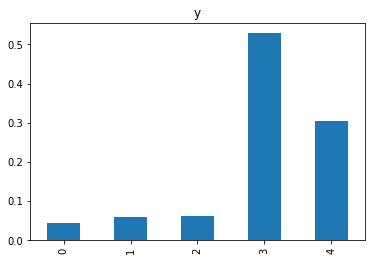

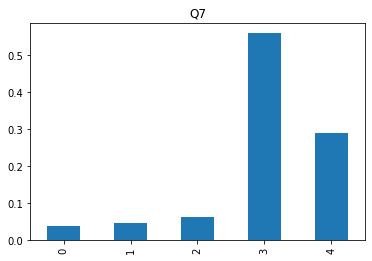

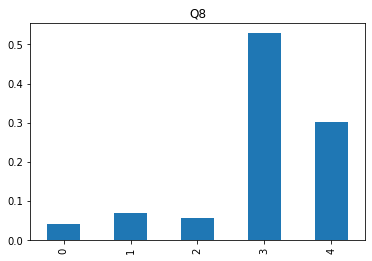

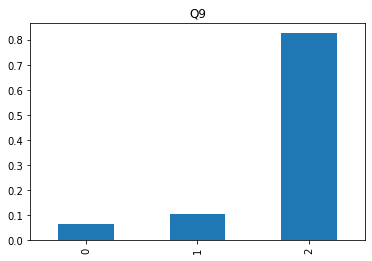

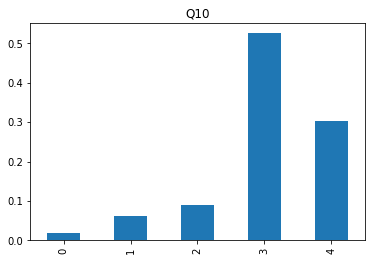

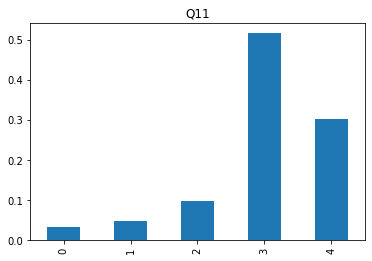

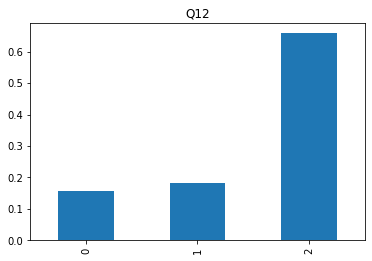

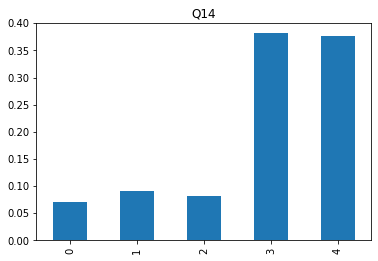

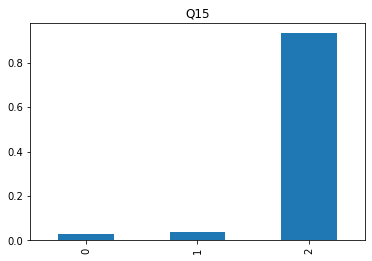

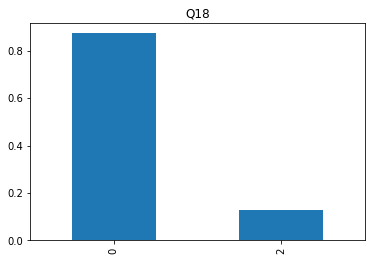

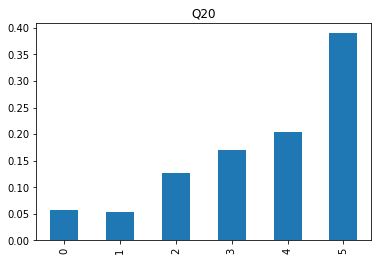

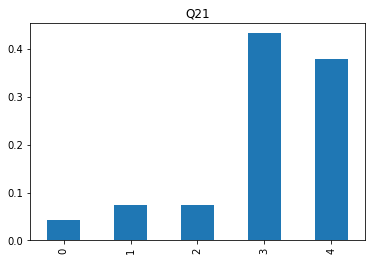

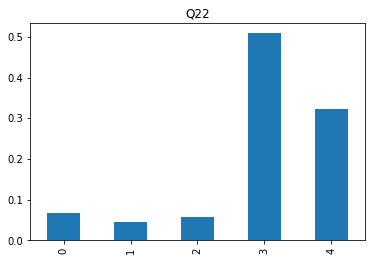

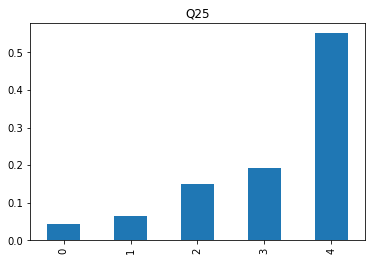

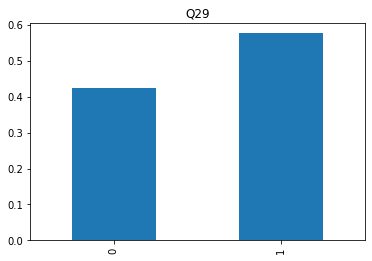

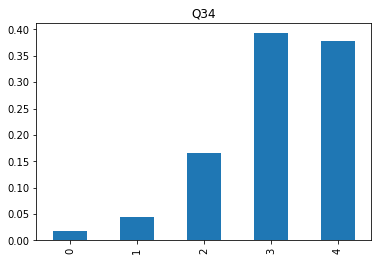

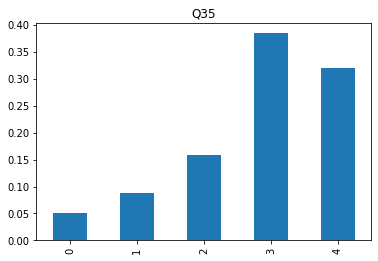

In [463]:
for column in survey_data.columns:
  survey_data[column].value_counts(normalize=True).sort_index().plot(kind="bar")
  plt.title("{}".format(column))

  plt.show()

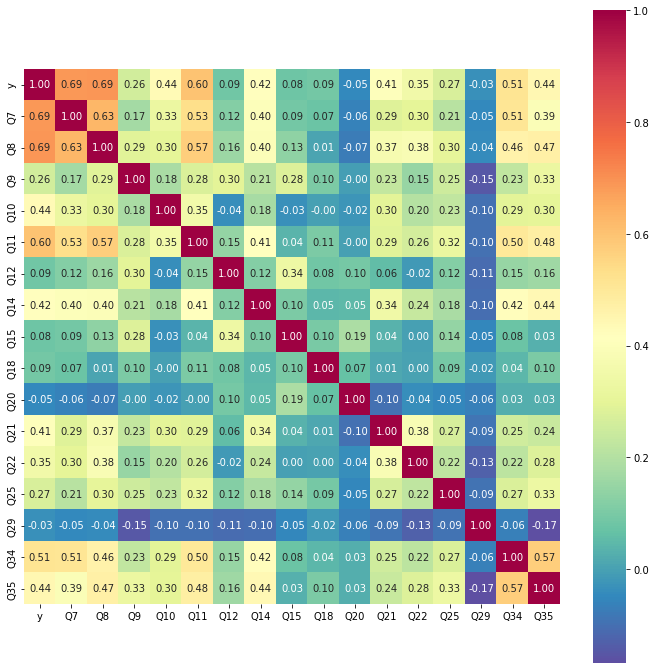

In [464]:
corrmat = survey_data.corr()
fig, ax = plt.subplots(figsize=(12,12))
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=survey_data.columns, 
                 xticklabels=survey_data.columns, 
                 cmap="Spectral_r")
plt.show()

# E) Statistical learning model

Is there a relationship between 2 variables?
How strong is the relationship?
Which variable contributes the most?
How accurately can we estimate the effect of each variable?
How accurately can we predict the target?
Is the relationship linear? (duh)
Is there an interaction effect?

In [465]:
data = ['Q7',	'Q8',	'Q9',	'Q10'	,'Q11',	'Q12'	,'Q14',	'Q15',	'Q18',	'Q20',	'Q21',	'Q22',	'Q25'	,'Q29',	'Q34',	'Q35']

In [466]:
Y = pd.DataFrame(survey_data['y'])

X = survey_data[data].to_numpy()
Y = Y.to_numpy()

model = sm.OLS(Y, X).fit()
model.summary(xname=data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              571.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):                   1.48e-233
Time:                        15:40:33   Log-Likelihood:                         -318.79
No. Observations:                 354   AIC:                                      669.6
Df Residuals:                     338   BIC:                                      731.5
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q7             0.3050      0.048      6.327      0.000       0.210       0.400
Q8             0.3030      0.048      6.344      0.000       0.209       0.397
Q9             0.0257      0.067      0.382      0.702      -0.106       0.158
Q10            0.1375      0.039      3.494      0.001       0.060       0.215
Q11            0.1419      0.047      3.022      0.003       0.050       0.234
Q12           -0.0490      0.048     -1.022      0.307      -0.143       0.045
Q14            0.0325      0.033      0.986      0.325      -0.032       0.097
Q15           -0.0897      0.082     -1.090      0.276      -0.252       0.072
Q18            0.0757      0.050      1.523      0.129      -0.022       0.174
Q20           -0.0073      0.022     -0.336      0.737      -0.050       0.035
Q21            0.0769      0.036      2.131      0.034       0.006       0.148
Q22            0.0118      0.034      0.348      0.728      -0.055       0.078
Q25           -0.0178      0.032     -0.562      0.575      -0.080       0.044
Q29            0.0420      0.065      0.651      0.516      -0.085       0.169
Q34            0.0714      0.047      1.520      0.129      -0.021       0.164
Q35           -0.0039      0.040     -0.099      0.921      -0.083       0.075
==============================================================================
Omnibus:                       65.128   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.093
Skew:                          -0.697   Prob(JB):                     1.24e-62
Kurtosis:                       7.170   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [467]:
#extract p-values for all predictor variables
for i,x in enumerate(data):
    if model.pvalues[i]<.05:
      print(x,"This predictor is statistically significant")

Q7 This predictor is statistically significant
Q8 This predictor is statistically significant
Q10 This predictor is statistically significant
Q11 This predictor is statistically significant
Q21 This predictor is statistically significant
